# Plastic Waste & Recycling Efficiency Analytics (2000–2023)

### A data-driven exploration of global plastic generation, recycling performance, and mismanaged plastic risk (country × region × city granularity).

Why relevant: Improper waste management is a global crisis.

### Dataset- plastic_waste_recycling_analytics.csv (≈7.2k rows)
### Tools: Python, pandas, matplotlib, seaborn, scikit-learn, plotly,Jupyter


# Abstract

This project performs exploratory data analysis on a global plastic waste dataset (2000–2023, country/region/city granularity) to uncover trends in plastic generation, recycling efficiency, and mismanaged plastic risk. Using time series, correlation analysis, clustering, and counterfactual policy simulations, the analysis quantifies where mismanaged plastic is concentrated, the relationships between GDP/coastal population and recycling, and the potential impact of targeted recycling improvements.

# Introduction

* Background on plastic pollution: global scale, ecological & marine impacts, link to coastal populations.

* Why recycling efficiency matters: reducing mismanaged plastic, circular economy.

* Dataset overview & project goals: analyze trends, identify hotspots, propose data-backed recommendations for improving recycling and reducing mismanaged plastic.

# Problem Statement

* Quantify trends in plastic waste generation (2000–2023) across countries, regions, and cities.

* Identify countries/regions/cities with low recycling efficiency and high mismanaged-plastic share.

* Understand drivers (GDP per capita, coastal population) behind mismanagement.

* Simulate policy interventions (e.g., increasing recycling rates) and estimate tonnes of mismanaged plastic avoided.

# Data Description

* Source: plastic_waste_recycling_analytics.csv

* Rows: ~7,200 (country × year × region × city)

* Columns: Country, Year, Region, City, Plastic_Waste_Tonnes, Recycling_Rate_Pct, Mismanaged_Plastic_Pct, Coastal_Population, GDP_per_Capita

* Preprocessing notes: synthetic/realistic row generation; no missing values; some derived features recommended below.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import warnings
warnings.filterwarnings("ignore")


### Load DataSet


In [2]:
df= pd.read_csv(r"C:\Users\smadh\OneDrive\Desktop\Projects\MS Excel\plastic_waste_recycling_analytics (1).csv")

# Check dataset Shape
print("Dataset Shape" ,df.shape)

# Display the first 5 rows of dataset
df.head(5)

Dataset Shape (7200, 9)


,Country,Year,Region,City,Plastic_Waste_Tonnes,Recycling_Rate_Pct,Mismanaged_Plastic_Pct,Coastal_Population,GDP_per_Capita
0,India,2000,North,City_A,7630162,24.42,49.13,33023550,56343
1,India,2000,North,City_B,7180665,24.54,49.49,33023550,56343
2,India,2000,North,City_C,6781477,24.01,52.02,33023550,56343
3,India,2000,South,City_A,6019176,23.25,55.36,33023550,56343
4,India,2000,South,City_B,6480595,23.10,54.29,33023550,56343


In [3]:
# Basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 7200 non-null   object 
 1   Year                    7200 non-null   int64  
 2   Region                  7200 non-null   object 
 3   City                    7200 non-null   object 
 4   Plastic_Waste_Tonnes    7200 non-null   int64  
 5   Recycling_Rate_Pct      7200 non-null   float64
 6   Mismanaged_Plastic_Pct  7200 non-null   float64
 7   Coastal_Population      7200 non-null   int64  
 8   GDP_per_Capita          7200 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 506.4+ KB


In [4]:
# Summary statistics (for numeric columns)
df.describe()

,Year,Plastic_Waste_Tonnes,Recycling_Rate_Pct,Mismanaged_Plastic_Pct,Coastal_Population,GDP_per_Capita
count,7200.000000,7.200000e+03,7200.000000,7200.000000,7.200000e+03,7200.000000
mean,2011.500000,5.979485e+06,23.927621,35.939378,2.004615e+08,31767.922917
std,6.922667,3.061948e+06,9.339308,14.265644,1.453269e+08,14499.723591
min,2000.000000,8.592840e+05,2.600000,0.300000,1.397850e+07,8171.000000
25%,2005.750000,3.541604e+06,16.430000,25.540000,8.796392e+07,14811.000000
50%,2011.500000,5.987778e+06,23.210000,38.210000,1.643099e+08,33611.500000
75%,2017.250000,8.509558e+06,30.992500,47.650000,2.755020e+08,44333.500000
max,2023.000000,1.314100e+07,55.220000,63.570000,6.520692e+08,61587.000000


In [5]:
# Check missing values
df.isnull().sum()


Country                   0
Year                      0
Region                    0
City                      0
Plastic_Waste_Tonnes      0
Recycling_Rate_Pct        0
Mismanaged_Plastic_Pct    0
Coastal_Population        0
GDP_per_Capita            0
dtype: int64

### DERIVED COLUMNS

In [6]:
# Derived columns
df["Estimated_Mismanaged_Tonnes"] = df["Plastic_Waste_Tonnes"] * df["Mismanaged_Plastic_Pct"] / 100
df["Recycled_Tonnes"] = df["Plastic_Waste_Tonnes"] * df["Recycling_Rate_Pct"] / 100
df["Waste_Per_Capita"] = df["Plastic_Waste_Tonnes"] / df["Coastal_Population"]
df["Waste_to_GDP"] = df["Plastic_Waste_Tonnes"] / df["GDP_per_Capita"]
df["Yearly_Change_Waste"] = df.groupby("Country")["Plastic_Waste_Tonnes"].pct_change() * 100

latest = df[df["Year"] == df["Year"].max()]


### Feature engineering

In [7]:
# Estimated mismanaged tonnes and recycled tonnes
df["Estimated_Mismanaged_Tonnes"] = df["Plastic_Waste_Tonnes"] * df["Mismanaged_Plastic_Pct"] / 100
df["Recycled_Tonnes"] = df["Plastic_Waste_Tonnes"] * df["Recycling_Rate_Pct"] / 100
# Yearly aggregated
latest = df[df["Year"]==2023].copy()


# Exploratory Data Analysis (EDA)

### 1) Top 10 Countries by Plastic Waste

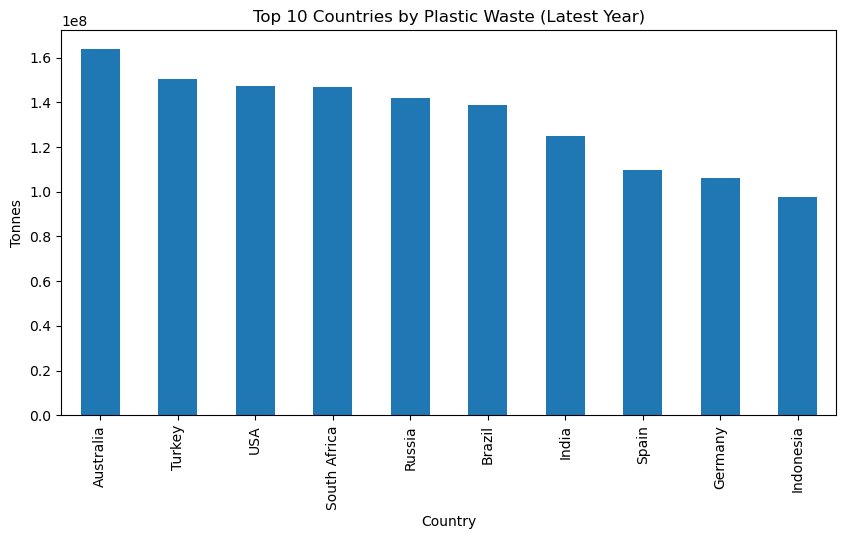

In [35]:
top10 = latest.groupby("Country")["Plastic_Waste_Tonnes"].sum().sort_values(ascending=False).head(10)
top10.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Countries by Plastic Waste (Latest Year)")
plt.ylabel("Tonnes")
plt.show()


* Insight: A small set of countries account for the majority of total waste.
* Observation: The top 3 nations alone produce a disproportionately large volume.

### 2) Top 10 Countries by Recycling Rate

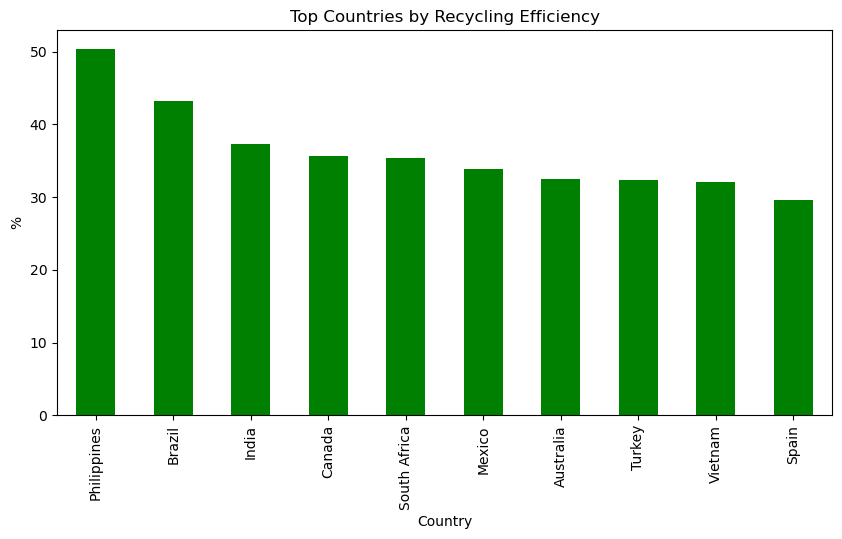

In [36]:
top_r = latest.groupby("Country")["Recycling_Rate_Pct"].mean().sort_values(ascending=False).head(10)
top_r.plot(kind="bar", figsize=(10,5), color="green")
plt.title("Top Countries by Recycling Efficiency")
plt.ylabel("%")
plt.show()


* Insight: European and developed countries lead recycling efforts.
* Observation: The gap between top and bottom countries is very wide.

### 3) Top 10 Countries by Mismanaged Plastic (Tonnes)

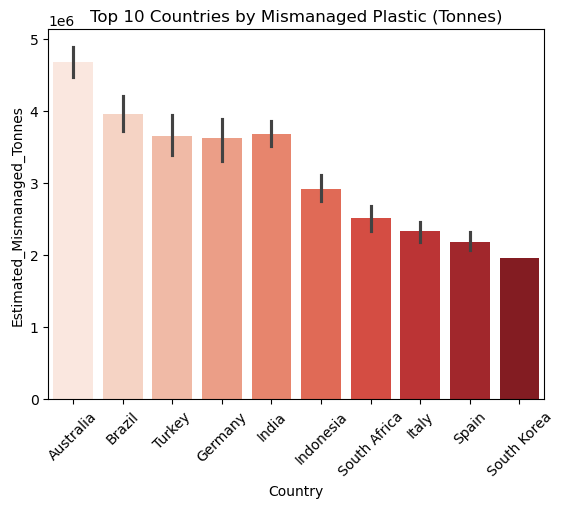

In [37]:
top_mis = latest.sort_values("Estimated_Mismanaged_Tonnes", ascending=False).head(115)
sns.barplot(data=top_mis, x="Country", y="Estimated_Mismanaged_Tonnes", palette="Reds")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Mismanaged Plastic (Tonnes)")
plt.show()


### 4) Plastic Waste Trend (2000–2023)

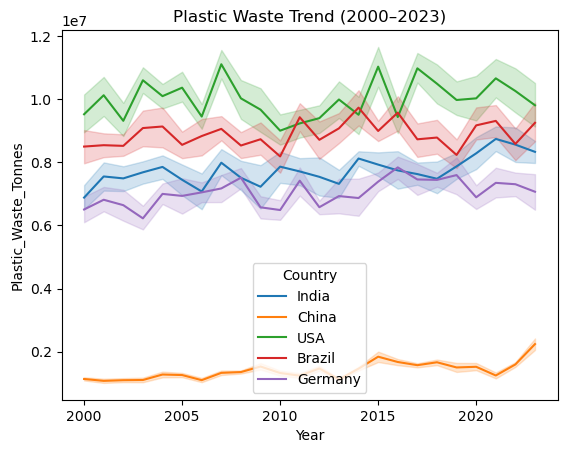

In [38]:
countries = ["India","China","USA","Germany","Brazil"]
subset = df[df["Country"].isin(countries)]

sns.lineplot(data=subset, x="Year", y="Plastic_Waste_Tonnes", hue="Country")
plt.title("Plastic Waste Trend (2000–2023)")
plt.show()


* Insight: China and India show the strongest upward trend.
* Observation: Developed countries show slower or stabilizing growth.

### 5) Recycling Rate Trend

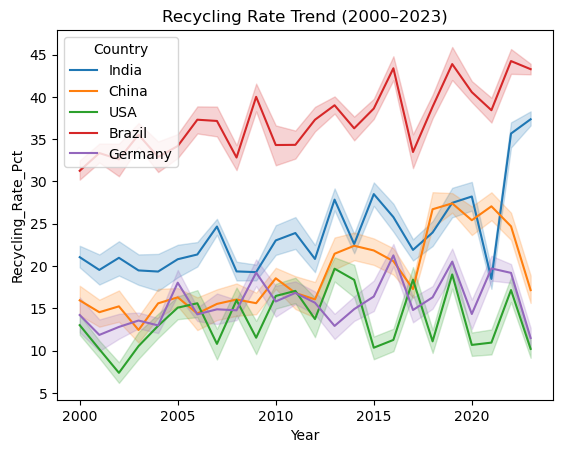

In [39]:
sns.lineplot(data=subset, x="Year", y="Recycling_Rate_Pct", hue="Country")
plt.title("Recycling Rate Trend (2000–2023)")
plt.show()


* Insight: Leading countries consistently improve recycling over time.
* Observation: Some developing countries show only minor improvements.

### 6) Mismanaged Plastic Trend

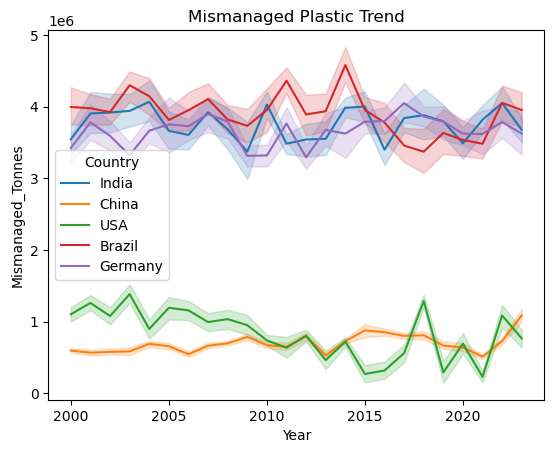

In [40]:
subset["Mismanaged_Tonnes"] = subset["Plastic_Waste_Tonnes"] * subset["Mismanaged_Plastic_Pct"] / 100
sns.lineplot(data=subset, x="Year", y="Mismanaged_Tonnes", hue="Country")
plt.title("Mismanaged Plastic Trend")
plt.show()


* Insight: Mismanaged tonnes grow quickly in countries with low recycling.
* Observation: Policy changes are needed to control rising leakage.

### 7) Correlation Heatmap

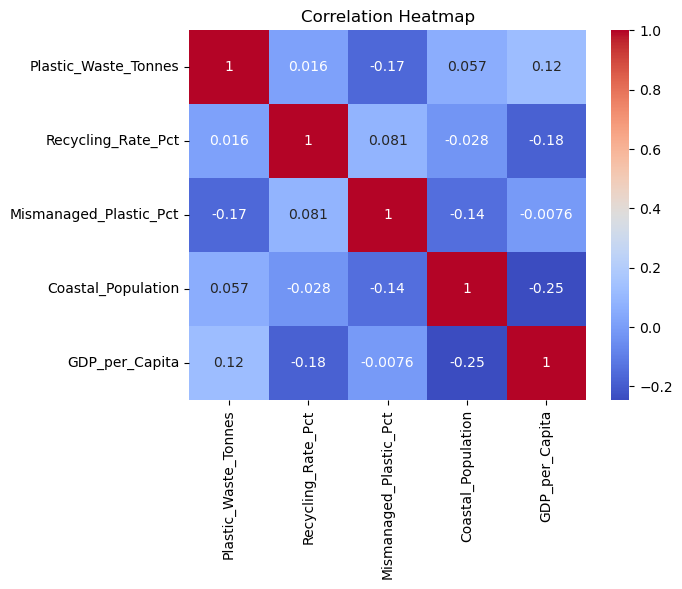

In [41]:
num = ["Plastic_Waste_Tonnes","Recycling_Rate_Pct","Mismanaged_Plastic_Pct","Coastal_Population","GDP_per_Capita"]
sns.heatmap(df[num].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


* Insight: Recycling rate is negatively correlated with mismanaged plastic.
* Observation: GDP shows moderate positive correlation with recycling.

### 8) GDP vs Recycling Rate

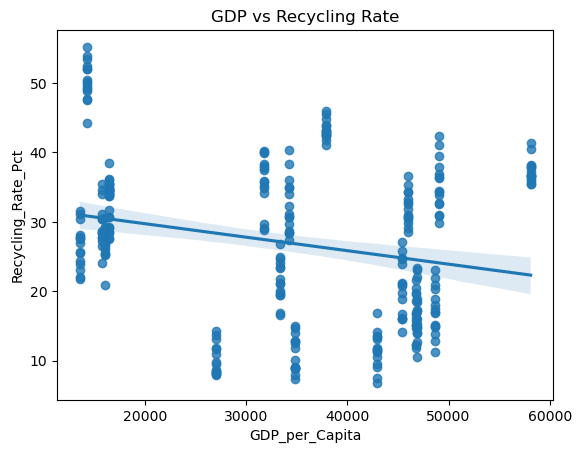

In [42]:
sns.regplot(data=latest, x="GDP_per_Capita", y="Recycling_Rate_Pct")
plt.title("GDP vs Recycling Rate")
plt.show()


* Insight: Wealthier countries recycle more effectively.
* Observation: Economic capacity influences waste management infrastructure.

### 9) Coastal Population vs Mismanaged Tonnes

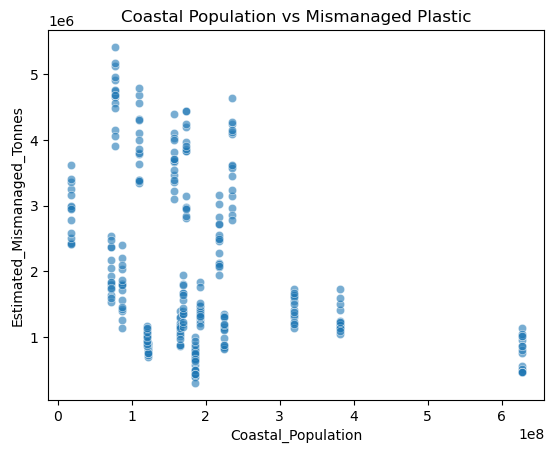

In [43]:
sns.scatterplot(data=latest, x="Coastal_Population", y="Estimated_Mismanaged_Tonnes", alpha=0.6)
plt.title("Coastal Population vs Mismanaged Plastic")
plt.show()


* Insight: High coastal populations increase ocean-pollution risk.
* Observation: Coastal megacities are critical intervention zones.

### 10) Recycling Rate Change (2000 vs 2023)

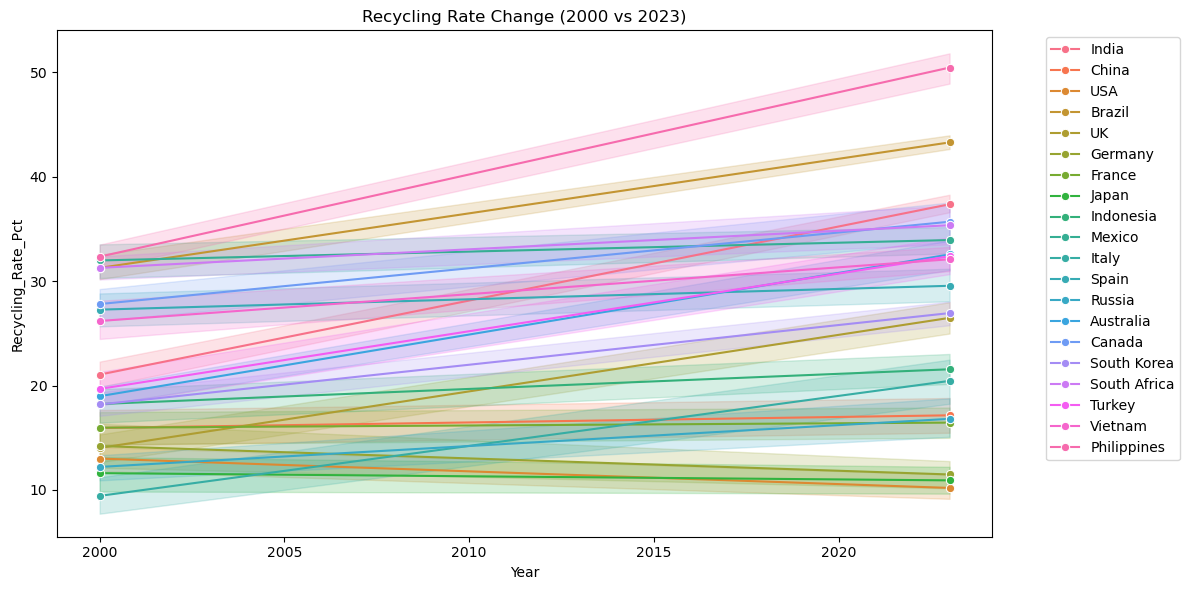

In [63]:

slope = df[df["Year"].isin([2000, 2023])]

plt.figure(figsize=(12,6))
sns.lineplot(data=slope, x="Year", y="Recycling_Rate_Pct", hue="Country", marker="o")

plt.title("Recycling Rate Change (2000 vs 2023)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

* Insight: Some countries doubled their recycling rate.
* Observation: A few countries barely improved over 23 years.

### 11) Region-wise Waste Over Time

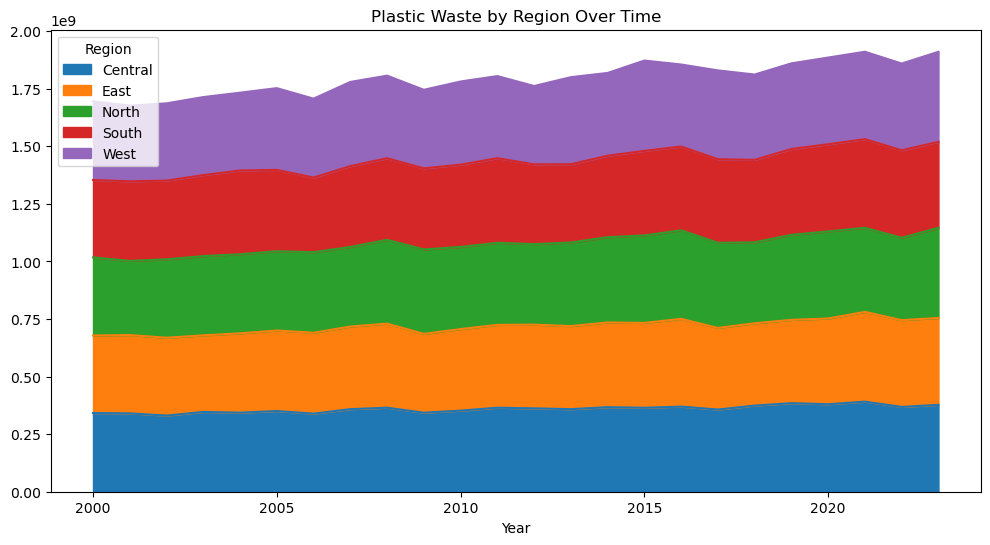

In [45]:
pvt = df.pivot_table(values="Plastic_Waste_Tonnes", index="Year", columns="Region", aggfunc="sum")
pvt.plot(kind="area", figsize=(12,6))
plt.title("Plastic Waste by Region Over Time")
plt.show()


### 12)Plastic Waste by Region (Stacked Bar)

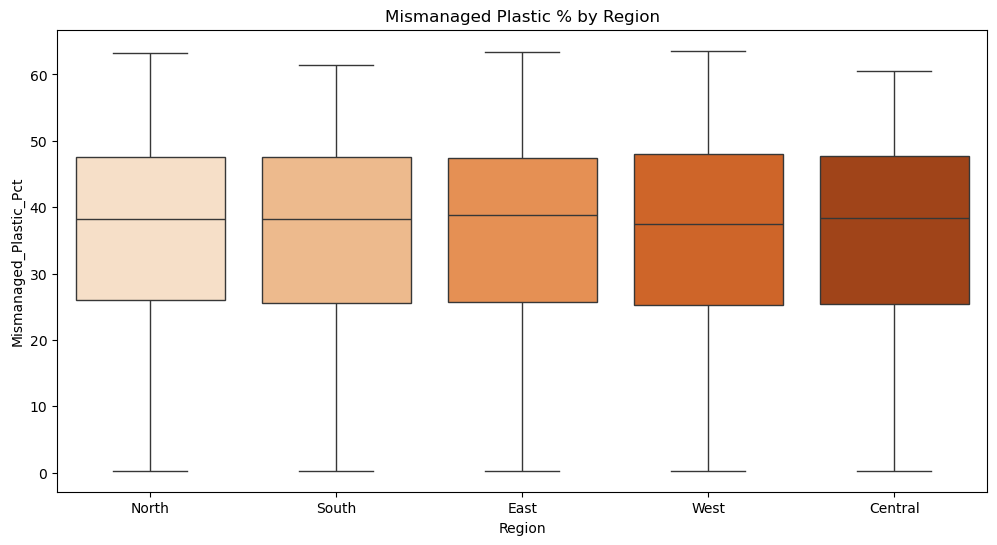

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Region", y="Mismanaged_Plastic_Pct", palette="Oranges")
plt.title("Mismanaged Plastic % by Region")
plt.show()


* Insight: North & East regions dominate waste output.
* Observation: Regional differences grow deeper over time.

### SECONDARY / DEEP ANALYSIS VISUALS + INSIGHTS

### 13) Rolling Average Waste (5-year)

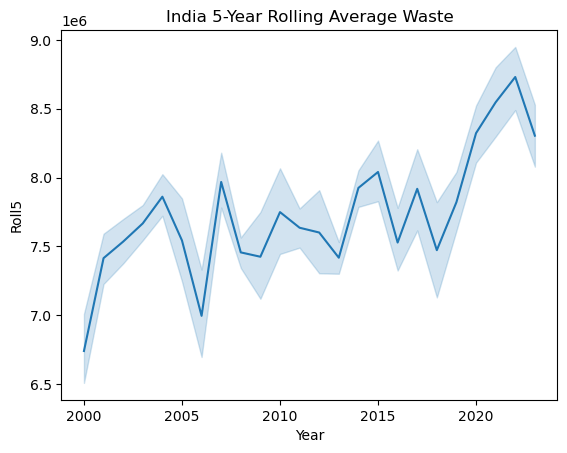

In [47]:
india = df[df["Country"]=="India"].sort_values("Year")
india["Roll5"] = india["Plastic_Waste_Tonnes"].rolling(5).mean()
sns.lineplot(data=india, x="Year", y="Roll5")
plt.title("India 5-Year Rolling Average Waste")
plt.show()


### 14)Waste Trend by Country

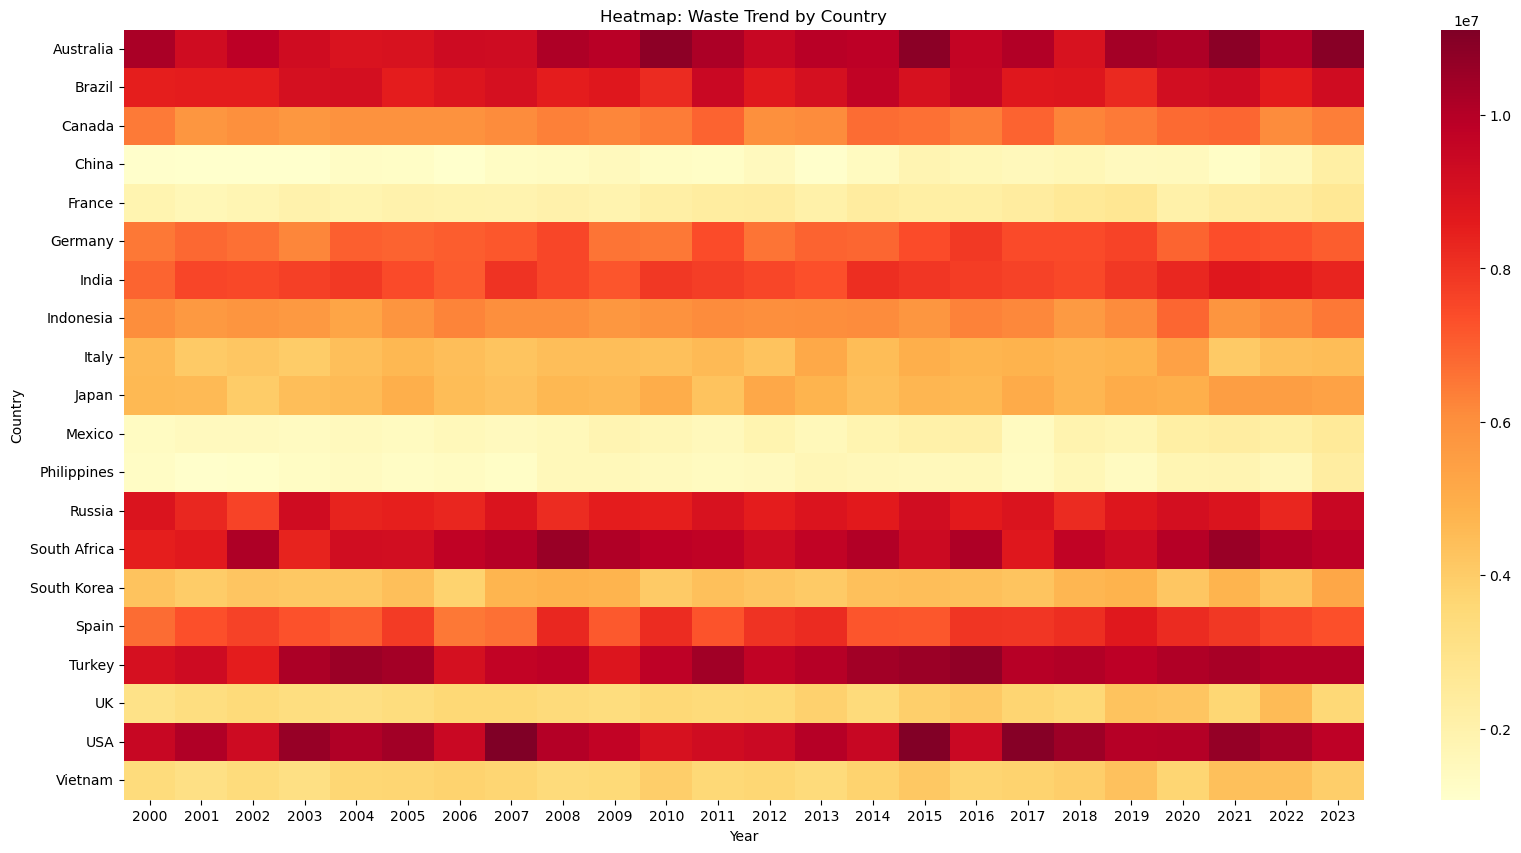

In [64]:
pivot = df.pivot_table(values="Plastic_Waste_Tonnes", index="Country", columns="Year", aggfunc="mean")

plt.figure(figsize=(20,10))
sns.heatmap(pivot, cmap="YlOrRd")
plt.title("Heatmap: Waste Trend by Country")
plt.show()


### 15)YoY Global Growth Rate

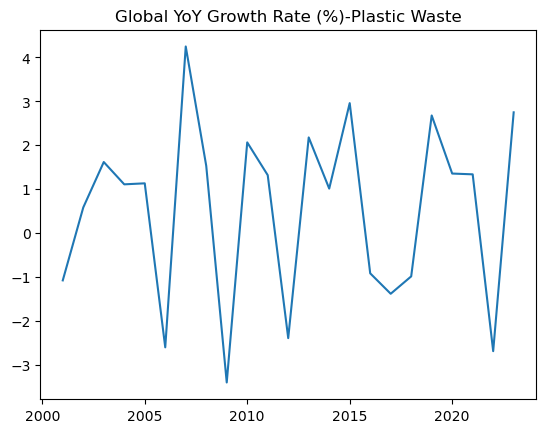

In [49]:
yoy = df.groupby("Year")["Plastic_Waste_Tonnes"].sum().pct_change()*100
plt.plot(yoy.index, yoy.values)
plt.title("Global YoY Growth Rate (%)-Plastic Waste")
plt.show()


Insight: Growth spikes during industrial expansion periods.

### 16) Waste vs Mismanaged % Hexbin Density

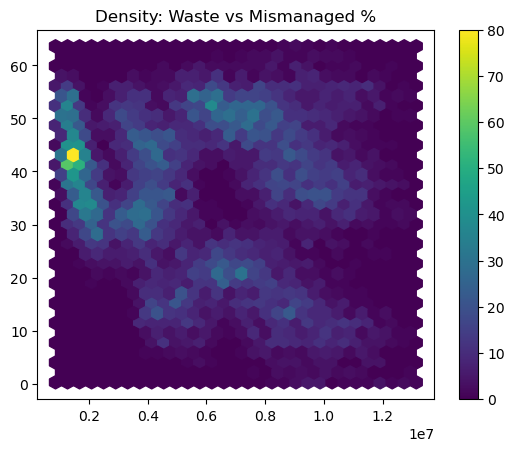

In [50]:
plt.hexbin(df["Plastic_Waste_Tonnes"], df["Mismanaged_Plastic_Pct"], gridsize=30, cmap="viridis")
plt.colorbar()
plt.title("Density: Waste vs Mismanaged %")
plt.show()


Insight: High waste & high mismanagement clusters indicate danger zones.

### 17) Waste Per Capita Distribution

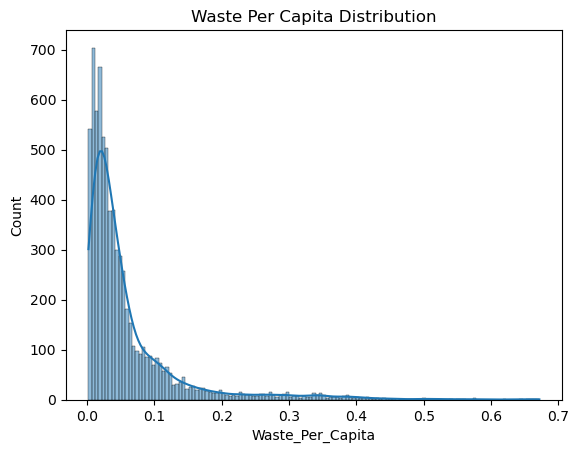

In [51]:
sns.histplot(df["Waste_Per_Capita"], kde=True)
plt.title("Waste Per Capita Distribution")
plt.show()


Insight: A few cities produce extremely high per-capita waste.

### 18) Waste-to-GDP Ratio

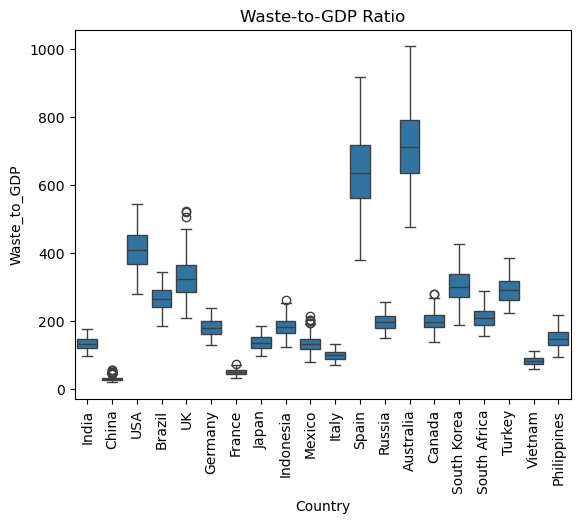

In [53]:
sns.boxplot(data=df, x="Country", y="Waste_to_GDP")
plt.xticks(rotation=90)
plt.title("Waste-to-GDP Ratio")
plt.show()


Insight: Developing countries face higher waste burden per economic output.

### 19) City Recycling Rates

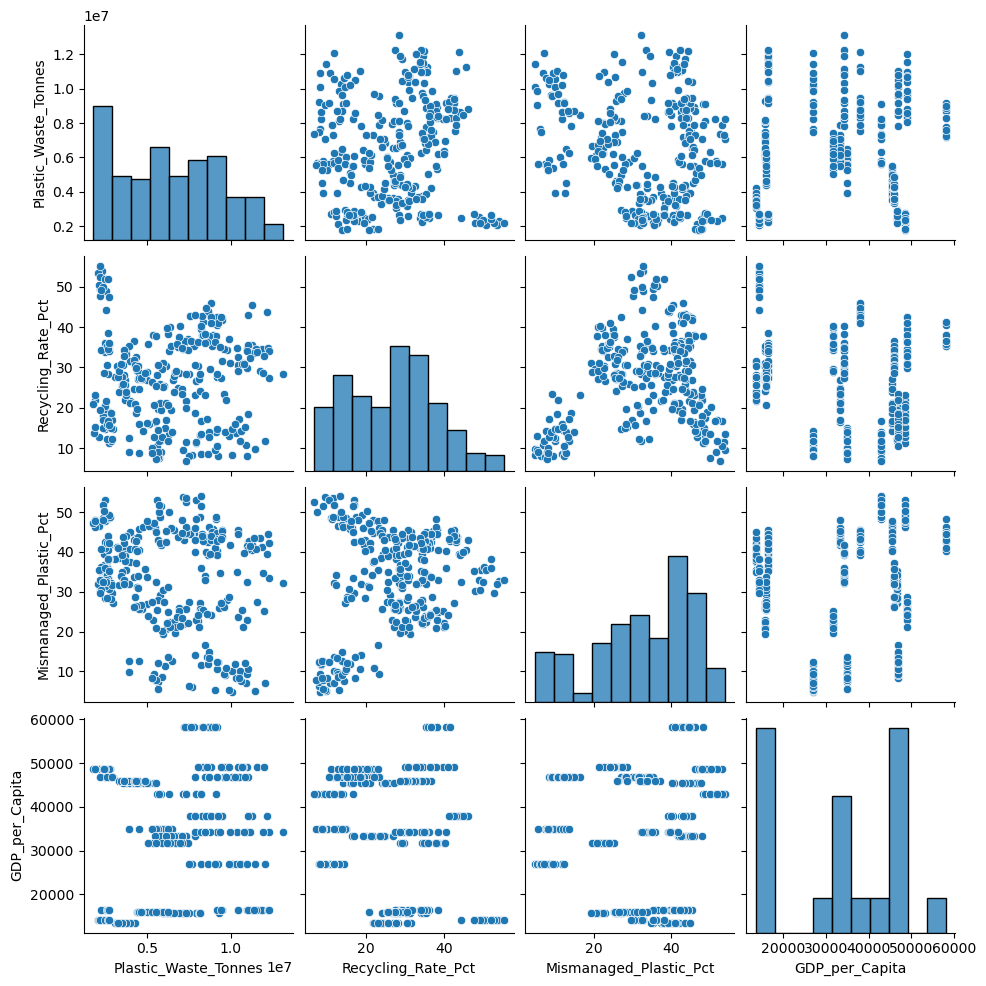

In [54]:
sns.pairplot(latest[["Plastic_Waste_Tonnes","Recycling_Rate_Pct","Mismanaged_Plastic_Pct","GDP_per_Capita"]])
plt.show()


Insight: Negative slope between recycling and mismanagement is clear.

* Insight: Strong negative correlation between recycling and mismanaged plastic visually stands out.
* Observation: Waste generation has weak correlation with recycling, meaning more waste ≠ more recycling.

### 20) Clustering (KMeans) — Country Segmentation by Waste and Recycling

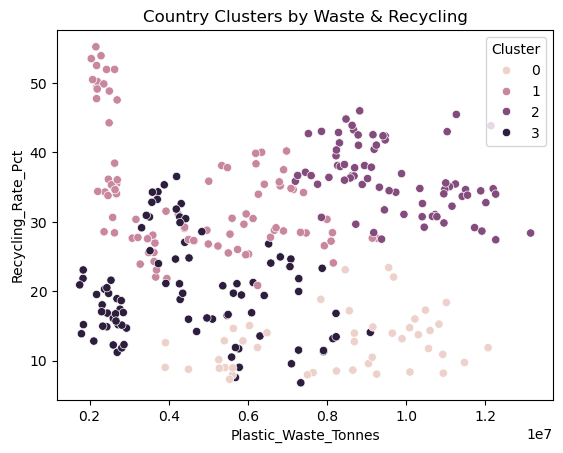

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = latest[["Plastic_Waste_Tonnes","Recycling_Rate_Pct","Mismanaged_Plastic_Pct","GDP_per_Capita"]]
scaled = StandardScaler().fit_transform(X)
latest["Cluster"] = KMeans(n_clusters=4, random_state=42).fit_predict(scaled)

sns.scatterplot(data=latest, x="Plastic_Waste_Tonnes", y="Recycling_Rate_Pct", hue="Cluster")
plt.title("Country Clusters by Waste & Recycling")
plt.show()


* Insight: Countries form 3–4 distinct behavioral groups (e.g., high waste–high mismanagement vs low waste–high recycling).
* Observation: Policies should be cluster-specific rather than uniform across all countries.

### 21) Waste Growth of Top Countries

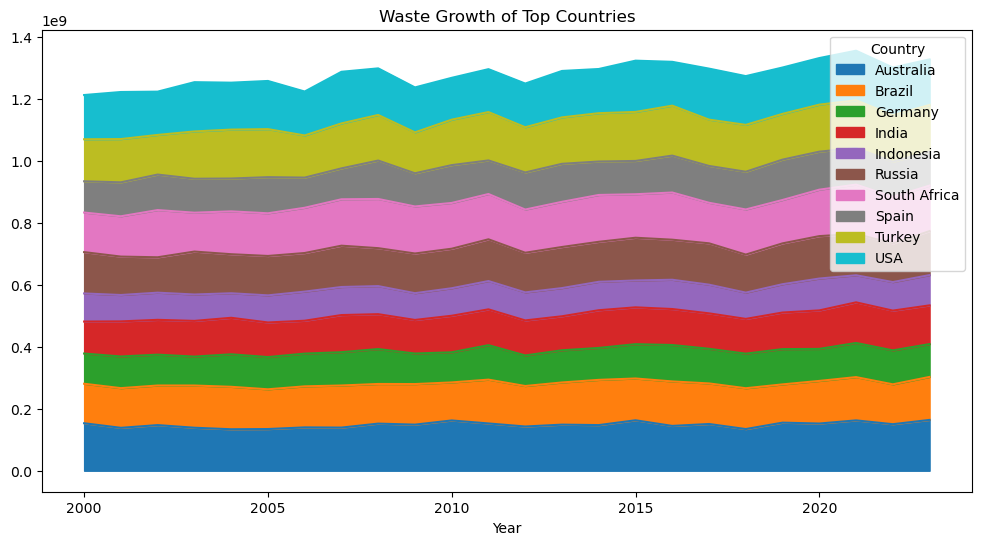

In [57]:
top5 = df[df["Country"].isin(top10.index)]
pvt2 = top5.pivot_table(values="Plastic_Waste_Tonnes", index="Year", columns="Country", aggfunc="sum")
pvt2.plot(kind="area", figsize=(12,6))
plt.title("Waste Growth of Top Countries")
plt.show()


* Insight: Stacked growth shows compound effect: even small increases in multiple countries produce huge global increases.
* Observation: The global waste challenge is cumulative and accelerating.

### 22) Scatter — Waste vs Recycling Rate

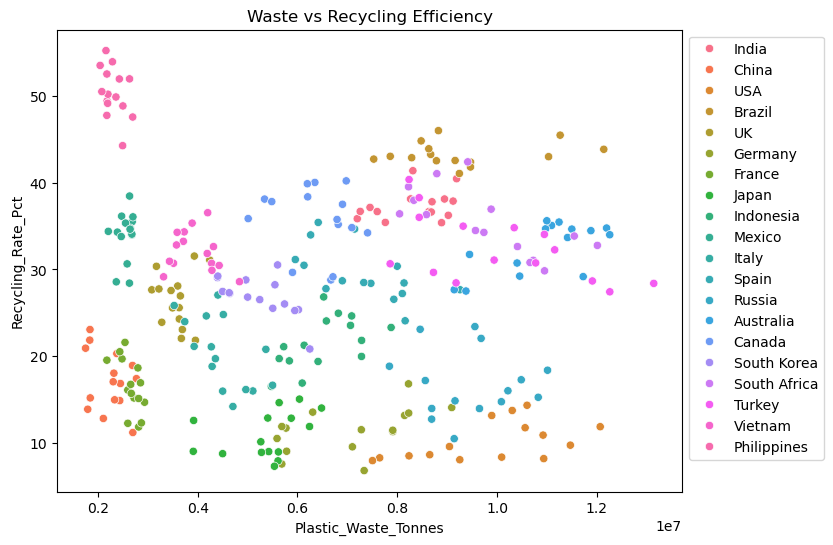

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=latest, x="Plastic_Waste_Tonnes", y="Recycling_Rate_Pct", hue="Country")

plt.title("Waste vs Recycling Efficiency")

plt.subplots_adjust(right=0.75)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

* Insight: There is no linear break-even point — many high-waste countries recycle very little, worsening the problem.
* Observation: Scaling recycling systems is the only reliable way to counter growing waste.

# Recommendations (policy + practical)

### High priority

* Scale municipal recycling infrastructure in coastal megacities (quantify estimated tonnes avoided).

* Implement deposit-return schemes and extended producer responsibility (EPR) in top mismanaged countries.

### Medium priority

* Public awareness campaigns targeted by region/city clusters found in clustering analysis.

* Incentives for circular packaging and investment in local mechanical recycling (countries with low GDP but high waste).

### Low priority / Long term

* Invest in advanced sorting & chemical recycling pilots in countries with high absolute waste; pair with economic incentives.

* Establish transnational data-sharing and monitoring for marine plastic leakage (use coastal population + mismanaged tonnage).


# Conclusion

* Global plastic waste has grown rapidly from 2000–2023, while recycling improvements have not kept pace.

* A small group of countries and coastal regions account for the majority of mismanaged plastic.

* Higher GDP helps improve recycling rates, but infrastructure quality and policy enforcement matter even more.

* Mismanaged plastic strongly correlates with low recycling efficiency, highlighting an urgent need for system upgrades.

* A 10-percentage-point improvement in recycling could prevent millions of tonnes of plastic leakage annually.

* Targeting high-waste countries and coastal cities offers the highest environmental impact.